In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import queue
import time

827


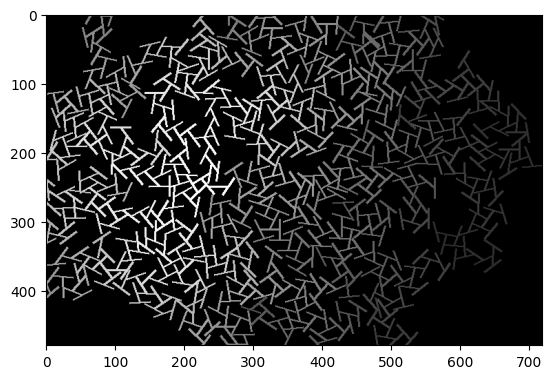

In [76]:

# Draw the line
def draw_line(img:ImageDraw, midpoint:tuple, angle:float, length:float, lines_drawn:int):
    # ImageDraw.line needs start & end point
    # Get start & end point from midpoint, length, angle
    (xm, ym) = midpoint

    # angle is 0 to 180 degrees. Convert from radians
    dx = length/2 * np.cos(angle*np.pi/180)
    dy = length/2 * np.sin(angle*np.pi/180)

    x1 = xm - dx
    y1 = ym - dy
    x2 = xm + dx
    y2 = ym + dy

    # Draw the line if the line doesn't collide
    if line_collides(image, image_draw, (x1, y1), (x2, y2)):
        return []
    else:
        r = 255 - round(lines_drawn * 255 / 1000) 
        g = 255 - round(lines_drawn * 255/ 1000) 
        b = 255 - round(lines_drawn * 255/ 1000) 
        img.line([(x1, y1), (x2,y2)], width=3, fill=(r, g, b))

        # Return the endpoints
        return [(x1, y1), (x2,y2)]

def queue_drawlines(image_draw:ImageDraw, image_dim:tuple, point:tuple, angle_in:float):
    # start a queue
    point_queue = queue.Queue()
    point_queue.put(point)
    point_queue.put(angle_in)
    lines_drawn = 0
    h, w = image_dim


    
    while not point_queue.empty() and lines_drawn < 1000:
        # Get next point
        curr_point = point_queue.get()
        curr_angle = point_queue.get()
        x0, y0 = curr_point

        # Draw this line if it's within the image
        if x0 < w and y0 < h and x0 > 0 and y0 > 0:
            endpoints = draw_line(image_draw, curr_point, curr_angle, 30, lines_drawn)
            if endpoints: # If we actually drew the line and the endpoints is not empty
                lines_drawn += 1

                # Add the endpoints to the queue
                point_queue.put(endpoints[0])
                point_queue.put(curr_angle + np.random.randint(45, 135))
                point_queue.put(endpoints[1])
                point_queue.put(curr_angle + np.random.randint(45, 135))

                # Display
                #plt.imshow(image)
                #plt.show()
    
    print(lines_drawn)
        
def line_collides(image:Image, image_draw:ImageDraw, pt1:tuple, pt2:tuple):
    # Check if, other than the middle of pt1 and pt2, if there's any point that is already drawn
    # parameterize distance between the two
    num_steps = 100
    
    x1, y1 = pt1
    x2, y2 = pt2
    length = np.sqrt((y2-y1)**2+(x2-x1)**2)
    unit_vector = ((x2-x1)/length, (y2-y1)/length)
    step_size = length / (num_steps + 1)

    points = []
    outer_checks = list(range(1, 41)) + list(range(60, 101)) # Skip the middle part of the line, bc we know the midpoint intersects our drawing
    for i in outer_checks:
        x = np.round(x1 + i * step_size * unit_vector[0])
        y = np.round(y1 + i * step_size * unit_vector[1])
        
        # If our point has already been drawn, quit
        if x > 0 and y > 0 and x < image.size[0] and y < image.size[1]:
            if image.getpixel((x, y)) != (0, 0, 0):
                return True
    
    return False

    


w = 720
h = 480

img = np.zeros((h, w))
image = Image.fromarray(img)
image = Image.new(mode='RGB', size=(w, h))
image_draw = ImageDraw.Draw(image)

queue_drawlines(image_draw, (h, w), (250, 250), 0)
plt.imshow(image)

1500


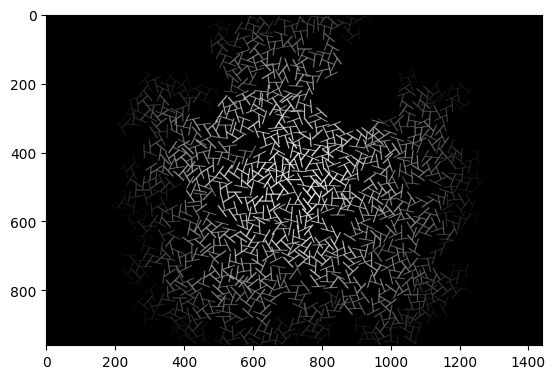

In [95]:
MAX_LINES = 1500
ANGLE_DEVIATION = 40 #degrees, +/-, that each line is drawn at
LENGTH = 40 # Length of the lines drawn

# Draw the line
def draw_line(image:Image, image_draw:ImageDraw, midpoint:tuple, angle:float, lines_drawn:int):
    # ImageDraw.line needs start & end point
    # Get start & end point from midpoint, length, angle
    (xm, ym) = midpoint

    # angle is 0 to 180 degrees. Convert from radians
    dx = LENGTH/2 * np.cos(angle*np.pi/180)
    dy = LENGTH/2 * np.sin(angle*np.pi/180)

    x1 = xm - dx
    y1 = ym - dy
    x2 = xm + dx
    y2 = ym + dy

    # Draw the line if the line doesn't collide
    if line_collides(image, (x1, y1), (x2, y2)):
        return []
    else:
        r = 255 - round(lines_drawn * 255 / 1500) 
        g = 255 - round(lines_drawn * 255/ 1500) 
        b = 255 - round(lines_drawn * 255/ 1500) 
        image_draw.line([(x1, y1), (x2,y2)], width=3, fill=(r, g, b))

        # Return the endpoints
        return [(x1, y1), (x2,y2)]


        
def line_collides(image:Image, pt1:tuple, pt2:tuple):
    # Check if, other than the middle of pt1 and pt2, if there's any point that is already drawn
    # parameterize distance between the two
    num_steps = 100
    
    x1, y1 = pt1
    x2, y2 = pt2
    length = np.sqrt((y2-y1)**2+(x2-x1)**2)
    unit_vector = ((x2-x1)/length, (y2-y1)/length)
    step_size = length / (num_steps + 1)

    # Skip the middle part of the line, bc we know the midpoint intersects our drawing
    # outer checks is the numbers 1 through 40, and 60 through 100
    # 1% through 40% and 60% through 100% of the distance are the regions we want to check
    # for collisions
    outer_checks = list(range(1, 31)) + list(range(70, 101)) 
    for i in outer_checks:
        x = np.round(x1 + i * step_size * unit_vector[0])
        y = np.round(y1 + i * step_size * unit_vector[1])
        
        # If our point has already been drawn, quit
        if x > 0 and y > 0 and x < image.size[0] and y < image.size[1]:
            # For color image, check against (0, 0, 0) (black)
            if image.getpixel((x, y)) != (0, 0, 0):
                return True
    return False

def queue_drawlines(image:Image, center_point:tuple, angle_in:float):
    # Draw on that thang
    image_draw = ImageDraw.Draw(image)
    w, h = image.size
    
    # start a queue
    # Each element will be the point, followed by its angle
    point_queue = queue.Queue()
    point_queue.put(center_point)
    point_queue.put(angle_in)
    
    lines_drawn = 0
    while not point_queue.empty() and lines_drawn < MAX_LINES:
        # Get next point
        curr_point = point_queue.get()
        curr_angle = point_queue.get()
        x0, y0 = curr_point

        # Draw this line if it's within the image
        if x0 < w and y0 < h and x0 > 0 and y0 > 0:
            endpoints = draw_line(image, image_draw, curr_point, curr_angle, lines_drawn)
            if endpoints: # If we actually drew the line and the endpoints is not empty
                lines_drawn += 1

                # Add the endpoints to the queue
                # +90 makes it perpendicular
                # (-1)^randrange(2) is either 1 or -1
                # Either add or subtract a random amount up to max angle deviation
                # e.g. ANGLE_DEVIATION = 45, new angle will be curr_angle + 90 + -1*randint(0, 46)
                point_queue.put(endpoints[0])
                point_queue.put(curr_angle + 90 + (-1)**np.random.randint(0, 2) * np.random.randint(0, ANGLE_DEVIATION + 1))
                point_queue.put(endpoints[1])
                point_queue.put(curr_angle + 90 + (-1)**np.random.randint(0, 2) * np.random.randint(0, ANGLE_DEVIATION + 1))

    # After while loop ends
    print(lines_drawn)

w = 2*720
h = 2*480

img = np.zeros((h, w))
image = Image.fromarray(img)
image = Image.new(mode='RGB', size=(w, h))

queue_drawlines(image, (w//2, h//2), 0)
plt.imshow(image)

In [96]:
image.save('out.png')